In [1]:
from beewalkvideotrack import BeeTrack

# Demo

In this demo we open the demo movie file, run the algorithm on it, and output some results.

In [2]:
#First, open the video file and store (low-res version) in memory
bt = BeeTrack('demovideo.mp4',fromframe=40)

Loading frames
.............................................................................................................................................................................

In [3]:
#Second, run the analysis, and compute various features.
bt.getpath()
bt.compute_features()

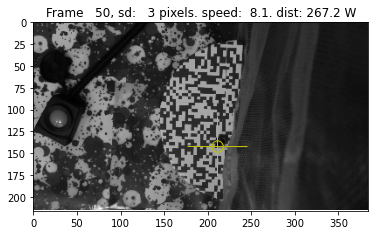

In [5]:
#Now just look at the outputs, e.g.:

bt.plotframe(50) #for example, look at frame 50

In [6]:
bt.totalwalkdist #total walk distance (pixels)

340.5341765213688

t:   2%|▏         | 3/131 [00:00<00:06, 20.97it/s, now=None]

Moviepy - Building video demoresult.mp4.
Moviepy - Writing video demoresult.mp4



Moviepy - Done !
Moviepy - video ready demoresult.mp4


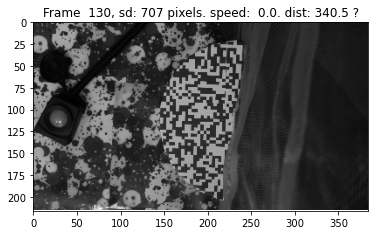

In [8]:
#this generates a new (low-res) mp4 to show the tracking behaviour
#which lets us check it's doing the right thing.
bt.makemovie('demoresult.mp4')

# Batch processing

In [ ]:
#This will loop through all the images in a folder called 'data', and record how far the bee walks in each
#in a csv called 'summarywalkdist.csv'.
from glob import glob
for fn in glob('data/*.mp4'):
    newfn = fn.split('.')
    newfn = '.'.join([newfn[0]+'_track',newfn[1]])
    bt = BeeTrack(fn)
    bt.getpath()
    bt.compute_features()
    bt.makemovie(newfn)
    with open('summarywalkdist.csv', 'a') as file:
        file.write('%s,%0.1f\n' % (fn.split('/')[1],bt.totalwalkdist))